In [9]:
import torch
x = [[1,2], [3,4], [5,6], [7,8]]
y = [[3], [7], [11], [15]]

In [10]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [12]:
import torch.nn as nn 
class MyNeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_to_hidden_layer = nn.Linear(2,8)
    self.activation = nn.ReLU()
    self.hidden_to_output_layer = nn.Linear(8,1)
  
  def forward(self, x):
    x = self.input_to_hidden_layer(x)
    x = self.activation(x)
    x = self.hidden_to_output_layer(x)
    return x



In [13]:
mynet = MyNeuralNet().to(device)

In [14]:
loss = nn.MSELoss()
y_pred = mynet(X)
loss_value = loss(y_pred, Y)
print(loss_value)

tensor(105.1416, grad_fn=<MseLossBackward>)


Text(0, 0.5, 'loss value')

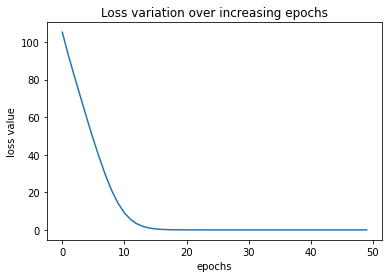

In [15]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr=0.001)
loss_history = []
for _ in range(50):
  opt.zero_grad()
  loss_value = loss(mynet(X), Y)
  loss_value.backward()
  opt.step()
  loss_history.append(loss_value)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')